In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
sns.set_style('darkgrid')

from torch import nn
from torch.utils.data import DataLoader
from transformers import AutoModel, AlbertTokenizerFast

from data import SNLICrossEncoderDataset, SNLIBiEncoderDataset
from data.utils import get_data, collate_fn, collate_fn_biencoder

from model import NLICrossEncoder, NLIBiEncoder

from training import Trainer
from training.utils import unfreeze_parameters

# Data

In [2]:
train, test, val = get_data('snli_1.0')

In [3]:
LABELS = ['entailment', 'contradiction', 'neutral']
NUM_LABELS = len(LABELS)

train = train[train.target.isin(set(LABELS))]
val = val[val.target.isin(set(LABELS))]
test = test[test.target.isin(set(LABELS))]

In [4]:
train.head()

,sentence1,sentence2,target
0,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,neutral
1,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",contradiction
2,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",entailment
3,Children smiling and waving at camera,They are smiling at their parents,neutral
4,Children smiling and waving at camera,There are children present,entailment


In [5]:
target2idx = {l: i for i, l in enumerate(LABELS)}
train.target = train.target.map(target2idx)
val.target = val.target.map(target2idx)
test.target = test.target.map(target2idx)

In [6]:
albert_tokenizer = AlbertTokenizerFast.from_pretrained('albert-base-v2')

In [7]:
train_dataset = SNLIBiEncoderDataset(albert_tokenizer, train.sentence1.tolist(), train.sentence2.tolist(), train.target.tolist())
val_dataset = SNLIBiEncoderDataset(albert_tokenizer, val.sentence1.tolist(), val.sentence2.tolist(), val.target.tolist())

In [8]:
train_loader = DataLoader(train_dataset, batch_size=48, shuffle=True, collate_fn=collate_fn_biencoder)
val_loader = DataLoader(val_dataset, batch_size=48, shuffle=False, collate_fn=collate_fn_biencoder)

# Model

In [9]:
albert = AutoModel.from_pretrained('albert-base-v2')

In [10]:
model = NLIBiEncoder(albert, NUM_LABELS, lambda x: x.pooler_output)

In [11]:
criterion = nn.CrossEntropyLoss()
trainer = Trainer(model, criterion, 'albert/v2/albert_snli.pt', 'albert/v2/albert_optimizer.pt', lr=1e-4, device='cuda:0')

# Training

In [12]:
trainer.train(train_loader, val_loader, num_epochs=30, frozen_encoder_epochs=1)

Epoch 1/30:


Mean loss: 1.0949585015773773. Current progress: : 100%|██████████| 11446/11446 [15:13<00:00, 12.53it/s]


Mean training loss: 1.0953346704261901. Mean validation loss: 1.0943060299245322.
Training accuracy: 0.34755454914474293. Validation accuracy: 0.34486970684039087.
Epoch 2/30:


Mean loss: 0.6502992432713509. Current progress: : 100%|██████████| 11446/11446 [38:39<00:00,  4.93it/s]


Mean training loss: 0.7553195606630081. Mean validation loss: 0.6174274345723594.
Training accuracy: 0.66305584427168. Validation accuracy: 0.7509161237785016.
Epoch 3/30:


Mean loss: 0.5857087196707725. Current progress: : 100%|██████████| 11446/11446 [38:29<00:00,  4.96it/s]


Mean training loss: 0.6040346294618061. Mean validation loss: 0.5479407015370159.
Training accuracy: 0.7559864352973513. Validation accuracy: 0.780435667752443.
Epoch 4/30:


Mean loss: 0.5297835335731507. Current progress: : 100%|██████████| 11446/11446 [38:27<00:00,  4.96it/s]


Mean training loss: 0.5402317184830553. Mean validation loss: 0.5105659543014154.
Training accuracy: 0.7866398964626561. Validation accuracy: 0.7967223127035831.
Epoch 5/30:


Mean loss: 0.5031466518193484. Current progress: : 100%|██████████| 11446/11446 [38:25<00:00,  4.97it/s] 


Mean training loss: 0.4968620716696193. Mean validation loss: 0.4947787914334274.
Training accuracy: 0.8061241392366123. Validation accuracy: 0.8015065146579805.
Epoch 6/30:


Mean loss: 0.479286268144846. Current progress: : 100%|██████████| 11446/11446 [38:36<00:00,  4.94it/s]  


Mean training loss: 0.46461186518105996. Mean validation loss: 0.49285416225107703.
Training accuracy: 0.820771906576114. Validation accuracy: 0.8040513029315961.
Epoch 7/30:


Mean loss: 0.4391781981885433. Current progress: : 100%|██████████| 11446/11446 [38:34<00:00,  4.95it/s] 


Mean training loss: 0.4514775233938522. Mean validation loss: 0.49933561224762985.
Training accuracy: 0.8266022531386122. Validation accuracy: 0.802728013029316.
Epoch 8/30:


Mean loss: 0.4423049605190754. Current progress: : 100%|██████████| 11446/11446 [38:36<00:00,  4.94it/s] 


Mean training loss: 0.42808891038950475. Mean validation loss: 0.49196095735561557.
Training accuracy: 0.8372272087693655. Validation accuracy: 0.8055781758957655.
Epoch 9/30:


Mean loss: 0.411624010771513. Current progress: : 100%|██████████| 11446/11446 [38:31<00:00,  4.95it/s]  


Mean training loss: 0.40563792123916725. Mean validation loss: 0.4923465032403062.
Training accuracy: 0.8470421412279951. Validation accuracy: 0.8079193811074918.
Epoch 10/30:


Mean loss: 0.39452033895254135. Current progress: : 100%|██████████| 11446/11446 [38:26<00:00,  4.96it/s]


Mean training loss: 0.38368622501965444. Mean validation loss: 0.5086415731325382.
Training accuracy: 0.8569772119548499. Validation accuracy: 0.8093444625407166.
Epoch 11/30:


Mean loss: 0.3782669996023178. Current progress: : 100%|██████████| 11446/11446 [38:33<00:00,  4.95it/s] 


Mean training loss: 0.3600157405683133. Mean validation loss: 0.5155552353800796.
Training accuracy: 0.8663753010282743. Validation accuracy: 0.8074104234527687.
Epoch 12/30:


Mean loss: 0.3517405775487423. Current progress: : 100%|██████████| 11446/11446 [38:35<00:00,  4.94it/s] 


Mean training loss: 0.3385938245906616. Mean validation loss: 0.5326818583942041.
Training accuracy: 0.8751308323943738. Validation accuracy: 0.8061889250814332.
Epoch 13/30:


Mean loss: 0.33247916282713413. Current progress: : 100%|██████████| 11446/11446 [38:39<00:00,  4.93it/s]


Mean training loss: 0.3161981928121756. Mean validation loss: 0.5677866657332676.
Training accuracy: 0.8847546357899182. Validation accuracy: 0.8003868078175895.
Validation performance has started degrading. Performing early stopping.


NLIBiEncoder(
  (encoder): AlbertModel(
    (embeddings): AlbertEmbeddings(
      (word_embeddings): Embedding(30000, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0, inplace=False)
    )
    (encoder): AlbertTransformer(
      (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
      (albert_layer_groups): ModuleList(
        (0): AlbertLayerGroup(
          (albert_layers): ModuleList(
            (0): AlbertLayer(
              (full_layer_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
              (attention): AlbertAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
      

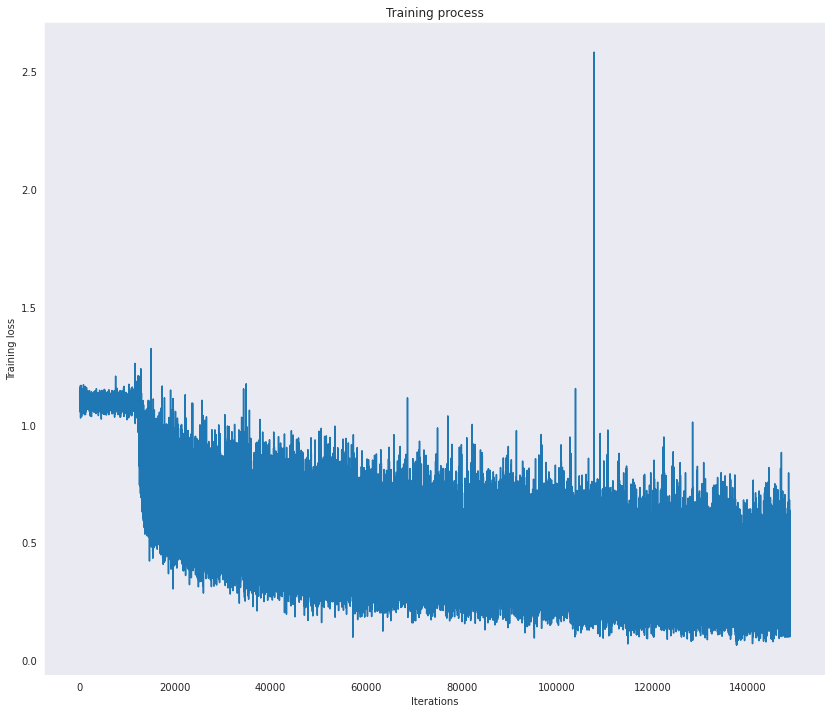

In [13]:
plt.figure(figsize=(14, 12))
plt.plot(trainer.train_losses)
plt.grid()
plt.title('Training process')
plt.xlabel('Iterations')
plt.ylabel('Training loss');

The observed loss dynamics suggest our model would benefit from a larger batch size.